In [1]:
import datetime
import openpyxl
import glob
import os
import re
import pprint
import math
import numpy as np

# ファイルの一覧を取得
# ファイル名に「JF/JM」を含むファイルのシートを1000行読み込む
xlsx_files = glob.glob("./btsjcorpus_ver2020/3.コーパスのトランスクリプト・音声/**/*.xlsx", recursive=True)
xlsx_files = [xlsx_file for xlsx_file in xlsx_files if "JF" or "JM" in xlsx_files]
# pprint.pprint("JF/JM抽出：" + str(xlsx_files))

In [14]:
dialog_list = []
now = datetime.datetime.now()

for xlsx_file in xlsx_files:
    # エクセルブック
    wb = openpyxl.load_workbook(xlsx_file, data_only=True)

    # エクセルシート
    ws = wb["Transcription"]

    # ヘッダーを除いて順番に読み込む
    for row in ws["H4:H1000"]: 
        if row[0].value is None:
            # print()
            break
        dialog_list.append(row[0].value)
        dialog = '\n'.join(dialog_list)

# 余計な文字をカット
# =:削除, {#}:中の文字ごと削除, <#>:中の文字ごと削除, (#):中の文字ごと削除, [#]:中の文字ごと削除, 【【:削除, 】】:削除
# JM or JF + 数字3桁: 削除
dialog = re.sub(r'=','',dialog)
dialog = re.sub(r'{.+?}','',dialog)
dialog = re.sub(r'\[.+?\]','',dialog)
dialog = re.sub(r'《.+?》','',dialog)
dialog = re.sub(r'\(.+?\)','',dialog)
dialog = re.sub(r'<.+?>','',dialog)
dialog = re.sub(r'[.+?]','',dialog)
dialog = re.sub(r'【【','',dialog)
dialog = re.sub(r'】】','',dialog)
dialog = re.sub(r'\\u3000','',dialog) 
dialog = re.sub(r'JM[0-9]{3}','',dialog)
dialog = re.sub(r'JF[0-9]{3}','',dialog)
dialog = re.sub(r'。。','。',dialog)
dialog = re.sub(r'。、','',dialog)

# 分割個数分のdialog.txtを作成
f = open('dialog(full).txt', 'w', encoding="utf-8")
f.write(dialog)

2174153

In [1]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import MeCab
import random
import sys
import io
import re
%matplotlib inline

path = './dialog_mini.txt'
# path = './dialog(full).txt'

with io.open(path, encoding="utf-8") as f:
    text = f.read().lower()
# print('corpus length:', len(text))
# 追加で前処理
text = re.sub(r'「|」|『|』','',text)
text = re.sub(r'人名|施設|地名|場所|','',text)
text = re.sub(r'。|,|、|#|ー','',text)
print(text)

# 形態素で単語単位に分割
tagger = MeCab.Tagger('-Owakati')

# 形態素で単語単位に分割
tagger = MeCab.Tagger('-Owakati')

# 単語をインデックスに変換
text = tagger.parse(text).split(' ')

chars = text
count = 0
char_indices = {}  # 辞書初期化
indices_char = {}  # 逆引き辞書初期化
 
for word in chars:
    if not word in char_indices:  # 未登録なら
       char_indices[word] = count  # 登録する      
       count +=1
       print(count,word)  # 登録した単語を表示
# 逆引き辞書を辞書から作成する
indices_char = dict([(value, key) for (key, value) in char_indices.items()])
 
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 5
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

Using TensorFlow backend.


する
うん
あ
昨日なか最後だったじゃんバイトが
うん
でね1君と
固有名詞出してる

1君と2と3君と

ちゃんが来てで2は魚の皿を買ってってでるいちゃんは自由帳を1君に買ってもらっててでなんかねそうそうそうあの名1のさあのカラオケボックスあるじゃん
名1っていう
はあああああああ
あの1で行くあのカラオケボックス
はいはいはい
オルするとこ
うんうんうん
あそこの店長と知り合いじゃん
知り合いなの
うん
知り合いなの
なんかね名1の会員のやつ
ああ
に登録してそしたらなんかメルダイレクトメルがきててでなんか店長は暇だったらしくてあの“メル友になってください”ってあなんかちがそういうのじゃなくて
そんなの

ちゃわかんないけど
ちがちがちが
で普通になんかdmが書いてあってあたしはいっつもそんなにだって部活のときしか行かないから別にいつもは使ってないのにdmもらうのは悪いなと思って“すいませねいつも”みたいなこと返信してたらなか向こうから何かと返事が返ってきててでまあそれから適当になんか話をしてであたしが店名1で働いてるってことが発覚したの
ああ
で“ちかいじゃないすかうち結構買いもの行ってますよ”っていう話んなってでなんかそれからちょくちょく来てくれるようんなってであたしが向こうに行ったときもなかサビスしてくれたりとかしたの
なんか学園祭名んときに5さんたちととか6先輩とかとあの行ったときにもなかお米プレゼントの企画をやっててなかくじ引き
カラオケで
そうそう
うん
くじ引きしてなんか当たったら米をもらえるんだけど1キロか2キロか忘れたな
1キロかな
うん
なんか5さんそんときに食う米に困っててで
欲しかったんだ
本気で欲しかったらしくてほんとはでもそれなんか券を持ってないとできなかったの
ああああ
でも7店長が“いいよいいよやってよ”とかいってやってやらしてくれてであたし5さん以外の人は全員当たって5さんは当たらなかったからだからみんなで5さんにお米をあげたりとかしててなんかいろいろサビスしてくれんの
ふん
でなんかあたこないだあれいつだっけな26日ぐらいにあたしがバイトに行ってたときにあの7店長が来て“あたしもうこん今月辞めるんですよ”とか言って
で“今日とあと31日しかこなあ明日ともうあと31しか来な

In [2]:
import numpy as np

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.uint8)
y = np.zeros((len(sentences), len(chars)), dtype=np.uint8)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
 
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
 
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
 
 
def sample(preds, temperature=1.0):
    # 確率を格納した配列からサンプリングする
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

Vectorization...
Build model...


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               1940480   
_________________________________________________________________
dense_1 (Dense)              (None, 3661)              472269    
_________________________________________________________________
activation_1 (Activation)    (None, 3661)              0         
Total params: 2,412,749
Trainable params: 2,412,749
Non-trainable params: 0
_________________________________________________________________


In [4]:
def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)
 
    start_index = random.randint(0, len(text) - maxlen - 1)
    start_index = 0  # テキストの最初からスタート
    for diversity in [0.2]:  # diversity は 0.2のみ使用 
        print('----- diversity:', diversity)
 
        generated = ''
        sentence = text[start_index: start_index + maxlen]
        # sentence はリストなので文字列へ変換して使用
        generated += "".join(sentence)
        print(sentence)
        
        # sentence はリストなので文字列へ変換して使用
        print('----- Generating with seed: "' + "".join(sentence)+ '"')
        sys.stdout.write(generated)
 
 
        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
 
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
 
            generated += next_char
            sentence = sentence[1:]
            # sentence はリストなので append で結合する
            sentence.append(next_char)  
 
            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
 
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [5]:
history = model.fit(x, y,
                    batch_size=128,
                    epochs=60,
                    callbacks=[print_callback])

# Plot Training loss 
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss" )
plt.title("Training loss")
plt.legend()
plt.savefig("loss_by_word(one-hot).png")
plt.close()

なんかちがそういうのじゃなくてそんなのちゃわかんないけどちがちがちがで普通になんかdmが書いてあってあたしはいっつもそんなにだって部活のときしか行かないから別にいつもは使ってないのにdmもらうのは悪いなと思って“すいませねいつも”みたいなこと返信してたらなか向こうから何かと返事が返ってきててでまあそれから適当になんか話をしてであたしが店名1で働いてるってことが発覚したのああで“ちかいじゃないすかうち結構買いもの行ってますよ”っていう話んなってでなんかそれからちょくちょく来てくれるようんなってであたしが向こうに行ったときもなかサビスしてくれたりとかしたのなんか学園祭名んときに5さんたちととか6先輩とかとあの行ったときにもなかお米プレゼントの企画をやっててなかくじ引きカラオケでそうそううんくじ引きしてなんか当たったら米をもらえるんだけど1キロか2キロか忘れたな1キロかなうんなんか5さんそんときに食う米に困っててで欲しかったんだ本気で欲しかったらしくてほんとはでもそれなんか券を持ってないとできなかった
Epoch 40/60
3656/3656 [==============================] - 6s 2ms/step - loss: 0.0118

----- Generating text after Epoch: 39
----- diversity: 0.2
['する', 'うん', 'あ', '昨日', 'なか']
----- Generating with seed: "するうんあ昨日なか"
するうんあ昨日なか最後だったじゃんバイトがうんでね1君と固有名詞出してる1君と2と3君とちゃんが来てで2は魚の皿を買ってってでるいちゃんは自由帳を1君に買ってもらっててでなんかねそうそうそうあの名1のさあのカラオケボックスあるじゃん名1っていうはああああああああの1で行くあのカラオケボックスはいはいはいオルするとこうんうんうんあそこの店長と知り合いじゃん知り合いなのうん知り合いなのなんかね名1の会員のやつああに登録してそしたらなんかメルダイレクトメルがきててでなんか店長は暇だったらしくてあの“メル友になってください”ってあなんかちがそういうのじゃなくてそんなのちゃわかんないけどちがちがちがで普通になんかdmが書いてあってあたしはいっつもそんなにだって部活

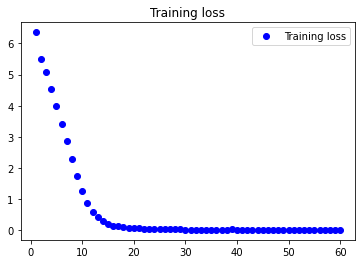

In [6]:
# 損失の推移
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label = "Training loss" )
plt.title("Training loss")
plt.legend()
plt.show()
plt.savefig("loss_by_word(one-hot).png")
plt.close()

In [8]:
# モデルと学習結果（パラメータ）の保存
json_string = model.to_json()
open('dialog_model_by_word_onehot.json', 'w').write(json_string)
model.save('dialog_model_by_word_onehot.h5')